In [2]:
from exponential import *
from scipy.optimize import minimize



In [3]:
params=[]
E=[]
N=[]

In [17]:
x0rs=np.array(np.meshgrid(np.linspace(0.1,2,11),np.linspace(0.1,2,11),np.linspace(0.1,2,11),indexing='ij')).reshape(3,-1).transpose()
ordering=(x0rs[:,0]-1)**2+(x0rs[:,1]-1)**2+(x0rs[:,2]-1)**2
x0rs=x0rs[np.argsort(ordering)]
print(x0rs)

[[1.05 1.05 1.05]
 [1.05 1.05 0.86]
 [0.86 1.05 1.05]
 ...
 [0.1  2.   2.  ]
 [2.   0.1  2.  ]
 [2.   2.   2.  ]]


In [182]:
np.sqrt(np.nextafter(0,1))

np.float64(2.2227587494850775e-162)

In [ ]:
params=[]
E=[]
N=[]
for i in range(100):
    print(i+1)
    def f(x):
        if x[0]<=0 or x[1]<=0 or x[2]<=0:
            return 10000
        
        theparams=np.expand_dims(np.array(params+[x]).transpose(),-1)

        subspace=Subspace(len(params)+1)

        subspace.set_N_func(N_func)
        subspace.set_H_func(H_func)

        subspace.set_params(1,theparams)

        subspace.make_N_mats_vectorized()
        subspace.make_H_mats_vectorized()
        subspace.find_N_eigens()

        if np.any(subspace.N_eigenvalues<=100*np.nextafter(0,1)):
            return 10000
    
        subspace.make_Y_mats()
        subspace.make_invs_sqrt_beta_mats()
        subspace.make_P_mats()
        subspace.find_P_eigens()
        subspace.find_energy_levels()

        if type(subspace.energy_levels[0,0])== np.complex128:
            return 10000
        
        return subspace.energy_levels[0,0]

    res=minimize(f,x0=[400,1,0.02]*np.random.normal(1,0.5,3),method='Nelder-Mead')

    if res.fun>=0:
        print("wtf")

    params.append(res.x)

    N.append(i+1)
    E.append(res.fun)

1
2
wtf
3


LinAlgError: Array must not contain infs or NaNs

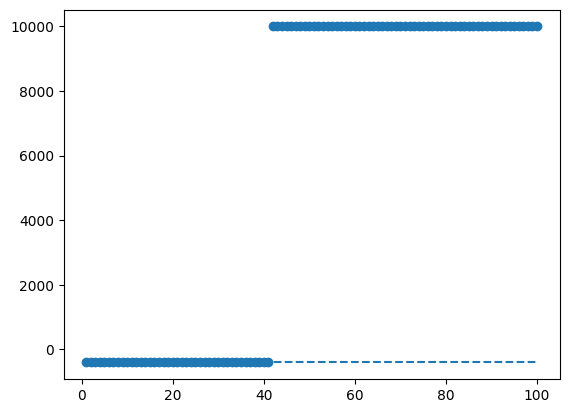

In [169]:
import matplotlib.pyplot as plt

plt.scatter(N,np.array(E))
plt.plot(N,np.array(N)*0-402.63730092734914,linestyle='--')

In [159]:
print(E)

[np.float64(-402.6373006723345), np.float64(-402.63730067233485), np.float64(-402.63730070788796), np.float64(-402.63730070798783), np.float64(-402.63730070806156), np.float64(-402.6373007108794), np.float64(-402.63730071088844), np.float64(-402.6373009216552), np.float64(-402.63730092165576), np.float64(-402.6373009216561), np.float64(-402.6373009217932), np.float64(-402.637301080186), np.float64(-402.63730108018814), np.float64(-402.6373010801886), np.float64(-402.637301080189), np.float64(-402.63730108021593), np.float64(-402.6373010802158), np.float64(-402.6373010802161), np.float64(-402.6373011128503), np.float64(-402.63730111287714), np.float64(-402.6373011128795), np.float64(-402.6373011128795), np.float64(-402.6373011192415), np.float64(-402.63730111925713), np.float64(-402.6373011192595), np.float64(-402.6373011192565), np.float64(-402.63730113479613), np.float64(-402.6373011348002), np.float64(-402.63730113480597), np.float64(-402.63730113615634), np.float64(-402.637301141381

In [160]:
def term(ai,bi,ci,aj,bj,cj):
    Ai=2*np.real(ai)+2*np.real(bi)
    Bi=2*np.real(ai)+2*np.real(ci)
    Ci=2*np.real(bi)+2*np.real(ci)
    Aj=2*np.real(aj)+2*np.real(bj)
    Bj=2*np.real(aj)+2*np.real(cj)
    Cj=2*np.real(bj)+2*np.real(cj)

    return (
        np.sqrt(Ai*Aj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Bi*Bj)/(np.conjugate(ai+bi)+aj+bj)
        *np.sqrt(Ci*Cj)/(np.conjugate(ai+bi)+aj+bj)
        *Ai*Bi*Ci/np.sqrt( Ai**2 * (Bi + Ci) + Bi**2 * (Ai + Ci) + Ci**2 * (Ai + Bi) + Ai*Bi*Ci)
        *Aj*Bj*Cj/np.sqrt( Aj**2 * (Bj + Cj) + Bj**2 * (Aj + Cj) + Cj**2 * (Aj + Bj) + Aj*Bj*Cj)
    )


In [161]:
np.meshgrid(np.arange(4))

(array([0, 1, 2, 3]),)

In [162]:
def delta(Amplitudes,params):
    ais, ajs=np.meshgrid(params[0],params[0])
    bis, bjs=np.meshgrid(params[1],params[1])
    cis, cjs=np.meshgrid(params[2],params[2])
    Ampis,Ampjs=np.meshgrid(Amplitudes,Amplitudes)
    terms=term(ais,bis,cis,ajs,bjs,cjs)
    sum=np.sum(np.conjugate(Ampis)*Ampjs*terms)
    return sum/(4*np.pi)

In [163]:
def HFS(Amplitudes,params):
    expdelta=np.pi*np.sum(Amplitudes/np.real(params[0]+params[1])**3)
    prefactor=(
        (1/(3*hbar))
        *alpha
        *(g2*g3/(m2*m3))
        )
    return prefactor*expdelta

In [171]:
D=[]
for n in N:
    theparams=np.expand_dims(np.array(params)[:n].transpose(),-1)

    subspace=Subspace(n)

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    subspace.set_params(1,theparams)

    subspace.make_N_mats_vectorized()
    subspace.make_H_mats_vectorized()
    subspace.find_N_eigens()
    subspace.make_Y_mats()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()

    subspace.find_energy_eigenstates()

    D.append(delta(subspace.energy_eigenstates[0,0],theparams[:,:,0]))

c:\Users\myles\Documents\GitHub\3-particle-quantum-systems\header.py:120: ComplexWarning: Casting complex values to real discards the imaginary part
  energy_eigenstates[i,j]=unorderd_energy_eigenstates[i,:,order[i,j]]/np.linalg.norm(unorderd_energy_eigenstates[i,:,order[i,j]]) #normalise vectors
c:\Users\myles\Documents\GitHub\3-particle-quantum-systems\header.py:76: RuntimeWarning: invalid value encountered in sqrt
  invs_sqrt_beta[:,i,i]=1/np.sqrt(self.N_eigenvalues[:,i])


LinAlgError: Array must not contain infs or NaNs

In [155]:
H_func(0,0,[400],[1],[0.02])

np.float64(-402.6257393165248)

In [139]:
print(8*np.pi*term(400,1,0.02,400,1,0.02))

105.88814275832569


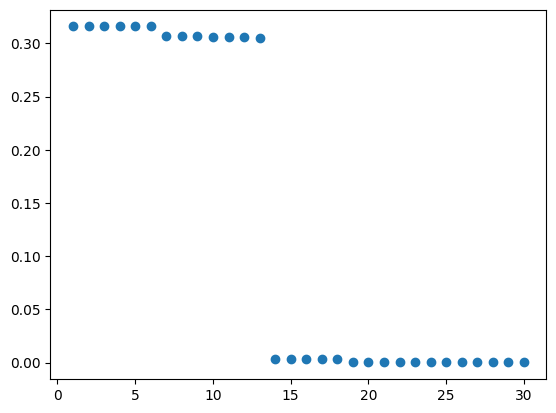

In [140]:
plt.scatter(N,D)

In [78]:
print(np.array(D))

[3.15908570e-01 3.15908606e-01 3.16804872e-01 3.16804917e-01
 3.16804980e-01 3.16804871e-01 3.16805114e-01 3.16805098e-01
 3.08970124e-01 3.08970079e-01 3.09114476e-01 3.09097438e-01
 1.36008613e-02 1.36005397e-02 1.35988899e-02 2.99685806e-03
 3.56528842e-04 3.13360053e-04 3.13988071e-04 3.14294304e-04
 3.13751038e-04 3.13862186e-04 3.12226014e-04 3.12982438e-04
 3.07591708e-04 3.09861424e-04 3.07998493e-04 1.65848184e-04
 8.69134454e-05 7.99219712e-05]


In [ ]:
x0=np.array(params).flatten()
dim=len(params)

In [ ]:
def f(x):
    theseparams=np.expand_dims(x.reshape(3,-1,order='F'),-1)

    for i in range(dim):
        a,b,c=theseparams[:,i].flatten()
        if a<0 or b<0 or c<0 or a*b==0 or a*c==0 or b*c==0:
            return 1000
        
    subspace=Subspace(dim)

    subspace.set_N_func(N_func)
    subspace.set_H_func(H_func)

    subspace.set_params(1,theseparams)

    subspace.make_N_mats_vectorized()
    subspace.make_H_mats_vectorized()
    subspace.find_N_eigens()
    if np.any(subspace.N_eigenvalues<0):
        return 1000
    subspace.make_Y_mats()
    subspace.make_invs_sqrt_beta_mats()
    subspace.make_P_mats()
    subspace.find_P_eigens()
    subspace.find_energy_levels()
    return subspace.energy_levels[0,0]
    
    

In [ ]:

res=minimize(f,x0=x0,method='Nelder-Mead')
print(res.fun)
x=res.x

In [ ]:
theseparams=np.expand_dims(x.reshape(3,-1,order='F'),-1)

subspace=Subspace(dim)

subspace.set_N_func(N_func)
subspace.set_H_func(H_func)

subspace.set_params(1,theseparams)

subspace.make_N_mats_vectorized()
subspace.make_H_mats_vectorized()
subspace.find_N_eigens()
subspace.make_Y_mats()
subspace.make_invs_sqrt_beta_mats()
subspace.make_P_mats()
subspace.find_P_eigens()
subspace.find_energy_levels()
subspace.find_energy_eigenstates()
print(subspace.energy_levels[0,0]*27.211386245981)

In [ ]:
theseparams.shape

In [ ]:
subspace.energy_eigenstates.shape

In [ ]:
delta=np.pi*np.sum(subspace.energy_eigenstates[0,0]/theseparams[:,:,0])
print(delta)

In [ ]:
print(delta)

In [ ]:
D=[]

In [ ]:
np.sum(np.real(theparams[:,:,0]),axis=0).shape

In [ ]:
subspace.energy_eigenstates[0,0].shape

In [ ]:
plt.scatter(N,D)

In [ ]:
print(D)